In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [13]:
import pandas as pd

# Attempt to read the CSV file with a specified encoding
df = pd.read_csv(r'D:\python\laptop_price1.csv', encoding='unicode_escape')
df.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [14]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [15]:
df['TypeName'].unique()
df['TypeName'].replace('Netbook', 'Notebook', inplace=True)


C:\Users\Meet lakhani\AppData\Local\Temp\ipykernel_21548\1502661640.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TypeName'].replace('Netbook', 'Notebook', inplace=True)


In [16]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [17]:
df.head(5)

df['Ram'] = df['Ram'].replace(r'GB', '', regex=True)

# Convert the column to float
df['Ram'] = df['Ram'].astype(int)




In [18]:
# df['Resolution'] = df['ScreenResolution'].apply(lambda x: int(x.split('x')[0]) * int(x.split('x')[1]))
# df['Resolution']

In [19]:
df['Weight'] = df['Weight'].replace(r'kg', '', regex=True)

df['Weight'] = df['Weight'].astype(float)
df['Weight']

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298    1.80
1299    1.30
1300    1.50
1301    2.19
1302    2.20
Name: Weight, Length: 1303, dtype: float64

In [20]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [21]:
le = LabelEncoder()
object_counlm = df.select_dtypes(include=["object"]).columns

for i in object_counlm :
    df[i] = le.fit_transform(df[i])

In [22]:
sns.boxplot(x = 'Price_euros',data = df)

NameError: name 'sns' is not defined

In [43]:
q1 = df['Price_euros'].quantile(0.25)
q3 = df['Price_euros'].quantile(0.75)

iqr = q3 - q1

min_range = q1 - (1.5 * iqr)
max_range = q3 + (1.5 * iqr)

df = df[df['Price_euros'] <= max_range]

<Axes: xlabel='Price_euros'>

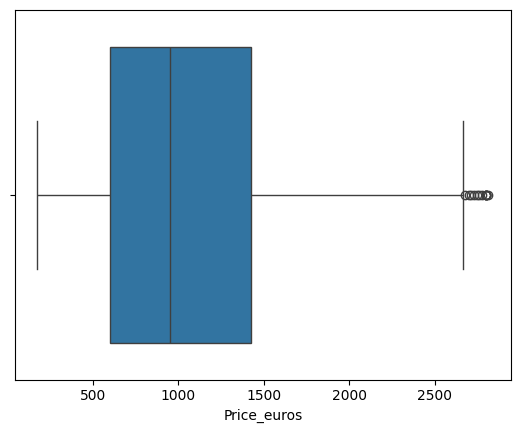

In [44]:
sns.boxplot(x = 'Price_euros',data = df)

In [45]:
X = df.drop(columns=['Price_euros', 'laptop_ID'])
y = df['Price_euros']


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = model.predict(X_test)

In [49]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mae : {mae}")
print(f"mse : {mse}")
print(f"r2 : {r2:.2f}")

mae : 258.1995794070207
mse : 108612.67550859522
r2 : 0.69


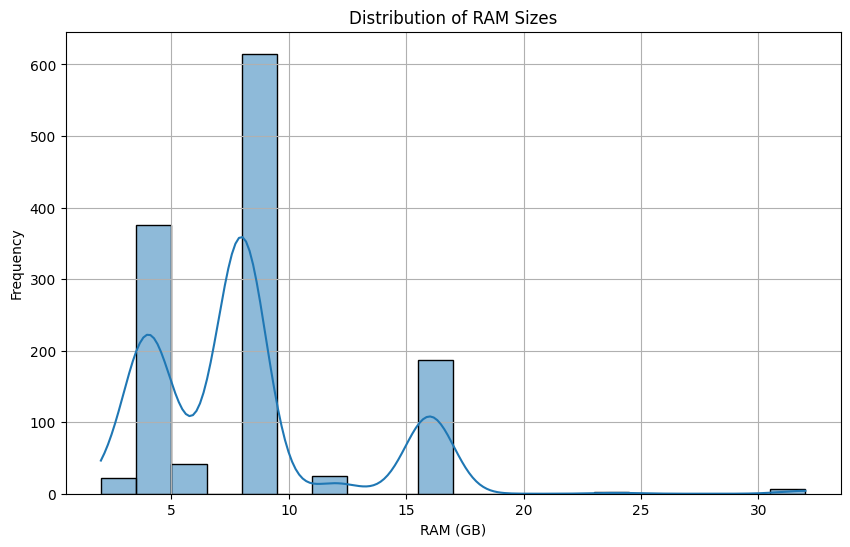

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Ram'], bins=20, kde=True)
plt.title('Distribution of RAM Sizes')
plt.xlabel('RAM (GB)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\jay\AppData\Local\Temp\ipykernel_15932\3810574504.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


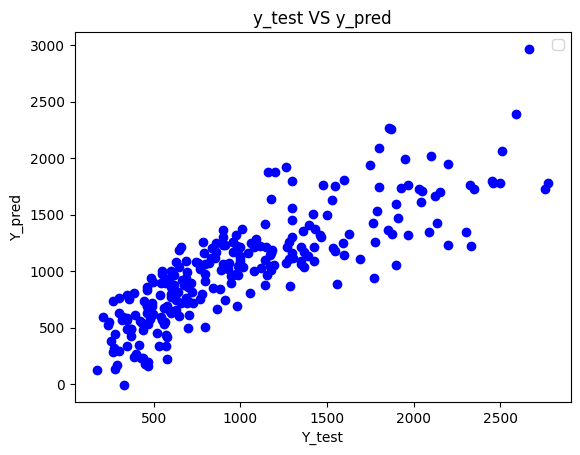

In [52]:
plt.scatter(y_test, y_pred,  color= 'blue')
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.title('y_test VS y_pred')
plt.legend()